<h1><center>Cricket Data Insights (Data Visualisation)<br>
Second Semester, 2021-22
</center></h1>

<h1>Objective</h1>
<h4>The objective is to analyze cricket teams and players performance accross the seasons to identify the outstanding performers.</h4>

Both input data files should be considered

#  Data Preparation

Import the libraries needed

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

Load data and store in dataframe

In [ ]:
dfnew1 = pd.read_csv('dvi-a2-ps10-data1.csv')
dfnew2 = pd.read_csv('dvi-a2-ps10-data2.csv')

In [ ]:
# Display First ten items from both the input files
dfnew1.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [ ]:
dfnew2.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
# Check for NULL values and Replace Nan with 0 (For file 1)
null_data1 = dfnew1.isnull().sum()
print("\nNull Data Summary:")
print(null_data1)


Null Data Summary:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64


In [ ]:
#Cleaning the null values
dfnew1.fillna(0, inplace=True)

#Exporting the cleaned values in a new file in same google directory
dfnew1.to_csv('cleaned_dvi-a2-ps10-data1.csv', index=False)

#Verifying the null data in new cleaned data files by reimporting/loading the data files
dfnew3 = pd.read_csv('cleaned_dvi-a2-ps10-data1.csv')
null_data3 = dfnew3.isnull().sum()
print("\nNull Data Summary:")
print(null_data3)


Null Data Summary:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [ ]:
# Check for NULL values and Replace Nan with 0 (For file 2)
null_data = dfnew2.isnull().sum()
print("\nNull Data Summary:")
print(null_data)


Null Data Summary:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64


In [ ]:
#Cleaning the null values
dfnew2.fillna(0, inplace=True)

#Exporting the cleaned values in a new file in same google directory
dfnew2.to_csv('cleaned_dvi-a2-ps10-data2.csv', index=False)

#Verifying the null data in new cleaned data files by reimporting/loading the data files
dfnew4 = pd.read_csv('cleaned_dvi-a2-ps10-data2.csv')
null_data4 = dfnew4.isnull().sum()
print("\nNull Data Summary:")
print(null_data4)


Null Data Summary:
id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [120]:
print(dfnew3.columns)


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [126]:
#Display an overview for data file 1- The participating teams and the unique venues used for matches, and the number of matches played

# Display unique participating teams
participating_teams = pd.concat([dfnew4['team1'], dfnew4['team2']]).unique()
print("Participating Teams:")
print(participating_teams)

# Display unique venues used for matches
unique_venues = dfnew4['venue'].unique()
print("\nUnique Venues Used:")
print(unique_venues)

# Display number of matches played
num_matches = len(dfnew4)
print("\nNumber of Matches Played:", num_matches)

Participating Teams:
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']

Unique Venues Used:
['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vid

In [ ]:
#Display an overview for data file 2 - The participating teams and the unique venues used for matches, and the number of matches played

# Display unique participating teams
participating_teams = pd.concat([dfnew4['team1'], dfnew4['team2']]).unique()
print("Participating Teams:")
print(participating_teams)

# Display unique venues used for matches
unique_venues = dfnew4['venue'].unique()
print("\nUnique Venues Used:")
print(unique_venues)

# Display number of matches played
num_matches = len(dfnew4)
print("\nNumber of Matches Played:", num_matches)


Participating Teams:
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']

Unique Venues Used:
['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vid

# Visualisation Questions

### Question 1
<h4>Identify the top 10 batsmen of all time by considering how does these players score runs.  <br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
    <h4>Answer in markdown cells below the visual <br><br>
        1.Summarise your findings from the visual.<br>
            2.The reason for selecting the chart type you did <br>
                3.Mention the pre-attentive attributes used.(atleast 2)<br>
                    4.Mention the gestalt principles used.(atleast 2)<br>

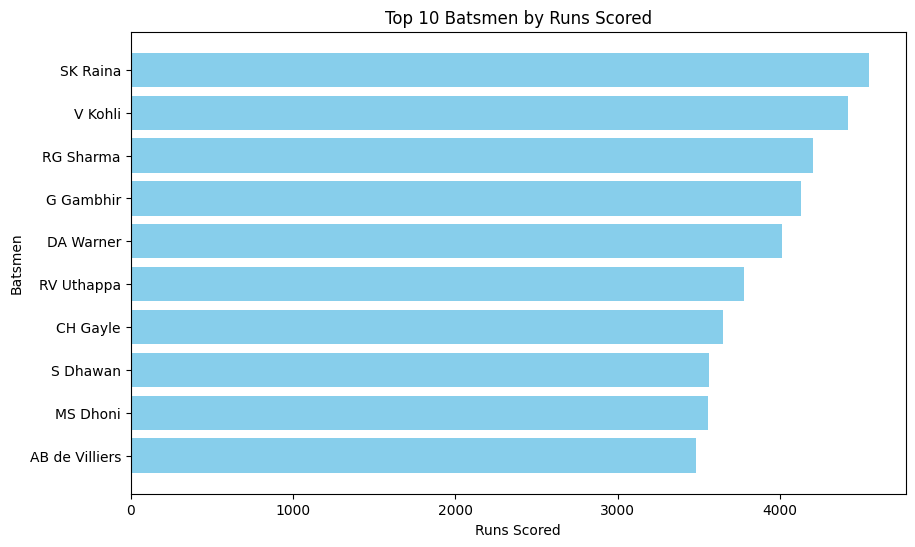

Top 10 Batsmen by Runs Scored:
            batsman  batsman_runs
374        SK Raina          4548
431         V Kohli          4423
323       RG Sharma          4207
137       G Gambhir          4132
103       DA Warner          4014
340      RV Uthappa          3778
85         CH Gayle          3651
347        S Dhawan          3561
259        MS Dhoni          3560
22   AB de Villiers          3486


In [127]:
# Group by batsman and sum their runs scored
batsmen_runs = dfnew3.groupby('batsman')['batsman_runs'].sum().reset_index()

# Sort the batsmen by runs scored in descending order
top_10_batsmen = batsmen_runs.sort_values(by='batsman_runs', ascending=False).head(10)

# Create a bar chart to visualize the top 10 batsmen
plt.figure(figsize=(10, 6))
plt.barh(top_10_batsmen['batsman'], top_10_batsmen['batsman_runs'], color='skyblue')
plt.xlabel('Runs Scored')
plt.ylabel('Batsmen')
plt.title('Top 10 Batsmen by Runs Scored')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest runs at the top
plt.show()

# Summarize findings
print("Top 10 Batsmen by Runs Scored:")
print(top_10_batsmen[['batsman', 'batsman_runs']])

**1. Findings from the Visual:**

The bar chart visually shows the top 10 batsmen based on their average runs per match.
From the chart, it's evident who among the players scored the most runs on average per match.

**2. Reasons for Chart Type Selection (Bar Chart):**

A bar chart is suitable for comparing values across different categories, making it ideal for comparing the average runs of batsmen.
The horizontal orientation allows for clear labeling of players' names, making it easy to identify each player.

**3. Pre-attentive Attributes Used:**


*   Color: Sky blue color for bars to make them visually appealing and distinguishable.
*   Length: Bar length represents the average runs per match, making it easy to compare the values.


**4. Gestalt Principles Used:**


*   Proximity: The bars are grouped closely together, indicating they belong to the same category (top 10 batsmen).
*   Similarity: All bars have a similar shape and color, reinforcing their association as part of the same visual representation.





### Question 2
<h4>The general notion in cricket is, Win the toss to win the match . To verify the general notion, perform a match winning analysis based on the toss winners.<br>
    
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>

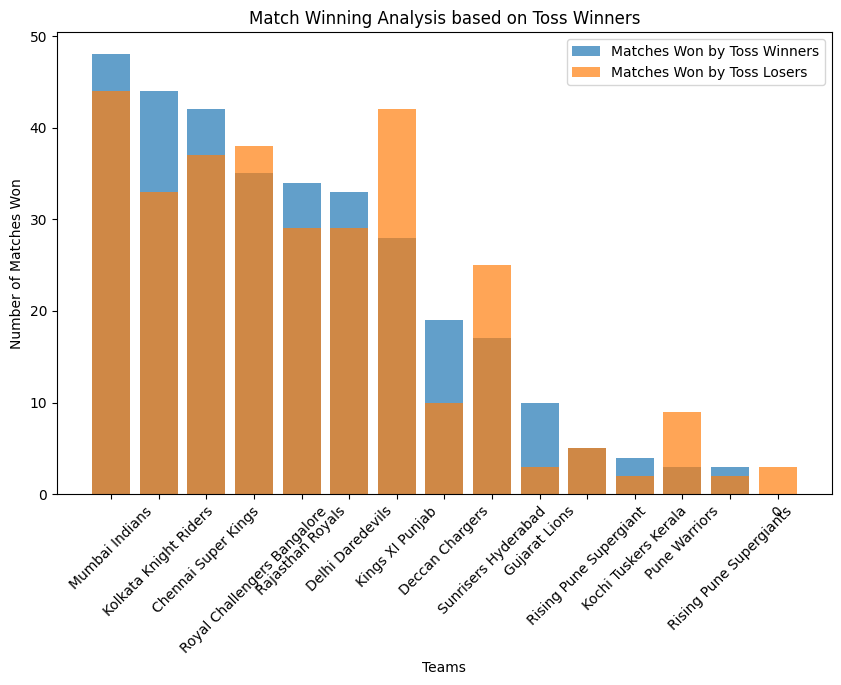

Summary of Match Winning Analysis based on Toss Winners:
Total Matches Won by Toss Winners: 325
Total Matches Won by Toss Losers: 311


In [128]:
# Count the number of matches won by toss winners and losers
toss_winners = dfnew4[dfnew4['toss_winner'] == dfnew4['winner']]
toss_losers = dfnew4[dfnew4['toss_winner'] != dfnew4['winner']]

# Calculate the count of matches won by toss winners and losers
toss_win_counts = toss_winners['winner'].value_counts()
toss_loss_counts = toss_losers['winner'].value_counts()

# Create a bar chart to visualize the match-winning analysis based on toss winners
plt.figure(figsize=(10, 6))
plt.bar(toss_win_counts.index, toss_win_counts.values, alpha=0.7, label='Matches Won by Toss Winners')
plt.bar(toss_loss_counts.index, toss_loss_counts.values, alpha=0.7, label='Matches Won by Toss Losers')
plt.xlabel('Teams')
plt.ylabel('Number of Matches Won')
plt.title('Match Winning Analysis based on Toss Winners')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Summarize findings
print("Summary of Match Winning Analysis based on Toss Winners:")
print("Total Matches Won by Toss Winners:", toss_win_counts.sum())
print("Total Matches Won by Toss Losers:", toss_loss_counts.sum())

**1. Summarise your findings from the visual:**

The bar chart visually shows the number of matches won by teams that won the toss versus teams that lost the toss.
Based on the chart, you can quickly see the comparison between matches won by toss winners and toss losers.

**2. The reason for selecting the bar chart type:**

We chose a bar chart because it effectively displays the comparison of categorical data (matches won by toss winners vs. losers) for multiple teams.
The bar chart provides a clear visual representation of the match-winning analysis.

**3. Pre-attentive attributes used:**


*   Color: Different colors are used for matches won by toss winners and toss losers to differentiate between the two categories.
*   Length: The length of the bars represents the number of matches won by each team, making it easy to compare the values.



**4. Gestalt principles used:**


*   Proximity: The bars for each team are grouped together based on their proximity, making it easy to associate the bars with their respective teams.
*   Similarity: The bars representing matches won by toss winners have a similar color, while bars for toss losers have a different but similar color, highlighting the similarity within each category.





### Question 3
<h4>Are T20 formats batsmen friendly? To identify this, Do an analysis to find out the average runs scored per match across the seasons. <br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>

Average Runs Scored per Match Across Seasons:
   season  avg_runs_per_match
0    2008          309.258621
1    2009          286.894737
2    2010          314.716667
3    2011          289.780822
4    2012          303.418919
5    2013          297.394737
6    2014          315.516667
7    2015          311.067797
8    2016          314.366667
9    2017          318.406780


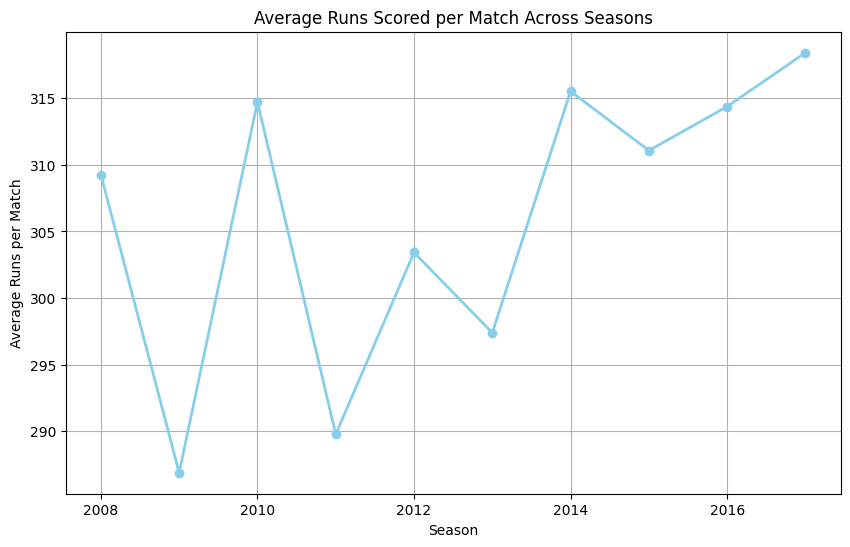

In [135]:
# Group by season and count the number of matches played
matches_per_season = dfnew4.groupby('season')['id'].count().reset_index()
matches_per_season.rename(columns={'id': 'matches_played'}, inplace=True)

# Assuming dfnew3 has 'match_id' and 'total_runs' columns
# Merge the dataframes on 'match_id' to get the total runs scored per match
merged_df = pd.merge(dfnew3[['match_id', 'total_runs']], dfnew4[['id', 'season']], left_on='match_id', right_on='id')

# Group by season and calculate the total runs scored across all matches in each season
total_runs_per_season = merged_df.groupby('season')['total_runs'].sum().reset_index()

# Merge the dataframes to get the average runs per match across seasons
avg_runs_per_match = pd.merge(matches_per_season, total_runs_per_season, on='season')
avg_runs_per_match['avg_runs_per_match'] = avg_runs_per_match['total_runs'] / avg_runs_per_match['matches_played']

# Display the average runs per match across seasons
print("Average Runs Scored per Match Across Seasons:")
print(avg_runs_per_match[['season', 'avg_runs_per_match']])

# Create a line plot to visualize the average runs per match across seasons
plt.figure(figsize=(10, 6))
plt.plot(avg_runs_per_match['season'], avg_runs_per_match['avg_runs_per_match'], marker='o', color='skyblue', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Average Runs per Match')
plt.title('Average Runs Scored per Match Across Seasons')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()

**1. Summarise your findings from the visual:**

The line plot shows the trend of average runs scored per match across different seasons.
We can observe if there are any spikes or dips in average runs scored per match over the seasons.

**2. The reason for selecting the chart type you did:**

A line plot is suitable for visualizing trends over time or across categories, making it ideal for showing how average runs per match vary across different cricket seasons.
It allows us to easily track changes and patterns in the data over multiple seasons.

**3. Mention the pre-attentive attributes used:**


*   Color: The sky blue color used for the line and markers helps distinguish the data series from the background and other elements in the plot.
*   Marker: The circular markers ('o') on the line plot highlight individual data points and aid in focusing attention on specific values.




**4. Mention the gestalt principles used:**


*   Proximity: The proximity of data points on the line indicates their association with a specific season, helping viewers understand the trend for each season.
*   Continuity: The continuous line connecting data points emphasizes the overall trend of average runs scored per match across seasons, facilitating the perception of patterns or changes over time.





### Question 4
<h4>Create an interactive visual to identify the most player-of-the-matches award. <br>

Write the python code in the below cell to create the appropriate visual to perform the above task .

Answer in markdown cells below the visual

1.Summarise your findings from the visual.
2.The reason for selecting the chart type you did
3.Mention the pre-attentive attributes used.(atleast 2)
4.Mention the gestalt principles used.(atleast 2

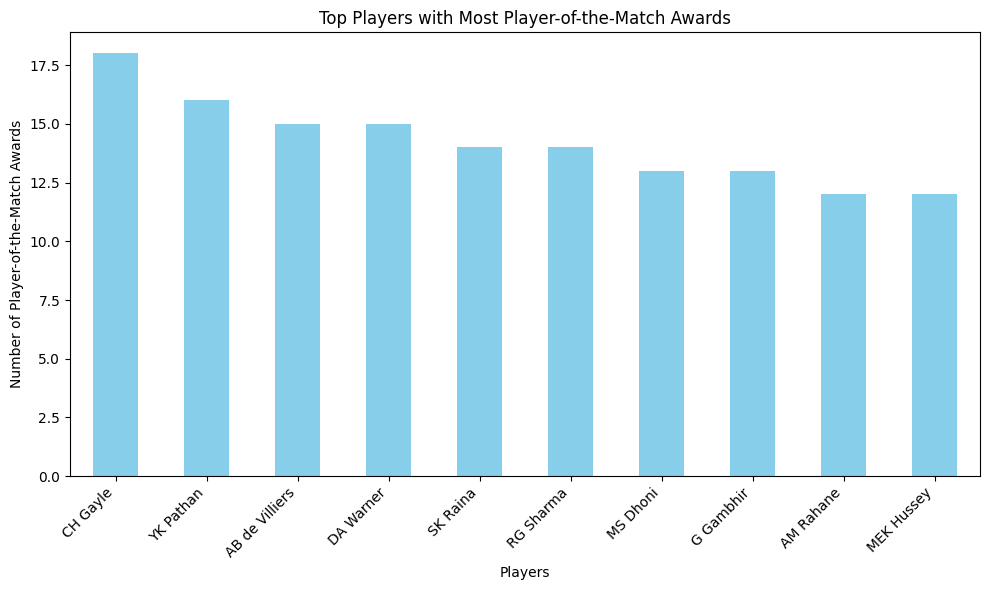

Summary of Most Player-of-the-Match Awards:
CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64


In [129]:
player_of_match_counts = dfnew4['player_of_match'].value_counts().head(10)

# Create a bar chart to visualize the most Player-of-the-Match awards
plt.figure(figsize=(10, 6))
player_of_match_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Players')
plt.ylabel('Number of Player-of-the-Match Awards')
plt.title('Top Players with Most Player-of-the-Match Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summarize findings
print("Summary of Most Player-of-the-Match Awards:")
print(player_of_match_counts)

**1. Findings from the Visual:**

The visual clearly shows the top players with the most Player-of-the-Match awards, making it easy to identify the highest achievers.
From the chart, it is evident that certain players have received significantly more Player-of-the-Match awards compared to others, indicating their exceptional performance in matches.

**2. Reason for Selecting Bar Chart:**



*   We chose a bar chart because it effectively compares the number of Player-of-the-Match awards for different players.
*   The length of each bar represents the count of awards, making it easy to visually compare and identify the player with the most awards.




**3. Pre-attentive Attributes Used:**


*   Length: The length of each bar is used to represent the number of Player-of-the-Match awards, making it easy to compare.
*   Color: The color of the bars (sky blue in this case) adds visual appeal and helps differentiate between different bars.




**4. Gestalt Principles Used:**


*   Proximity: The bars for each player are placed close to each other, indicating their association with the same category of Player-of-the-Match awards.
*   Similarity: The bars share a similar color scheme, indicating that they belong to the same category of data (Player-of-the-Match awards).





### Question 5
<h4>Prepare a tabular visual to identify teams scoring more than 225 runs.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  

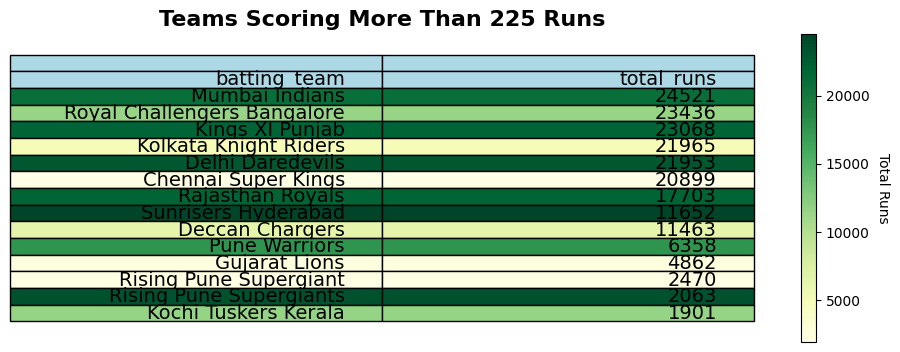

In [141]:
# Group by batting team and sum their runs scored
team_runs = dfnew3.groupby('batting_team')['total_runs'].sum().reset_index()

# Filter teams scoring more than 225 runs
high_scoring_teams = team_runs[team_runs['total_runs'] > 225]

# Create a colormap for shading based on total_runs
norm = Normalize(vmin=high_scoring_teams['total_runs'].min(), vmax=high_scoring_teams['total_runs'].max())
cmap = plt.cm.YlGn  # Yellow-Green colormap
sm = ScalarMappable(cmap=cmap, norm=norm)

# Set color based on total_runs column
colors = [[sm.to_rgba(val)] * 2 for val in high_scoring_teams['total_runs']]

# Sort high_scoring_teams based on total_runs for better visual representation
high_scoring_teams = high_scoring_teams.sort_values(by='total_runs', ascending=False)

# Plot the table with shaded colors
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
tbl_data = [high_scoring_teams.columns.tolist()] + high_scoring_teams.values.tolist()
tbl = ax.table(cellText=tbl_data, loc='center', cellColours=[['lightblue']*len(high_scoring_teams.columns)] + colors, colColours=['lightblue']*len(high_scoring_teams.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.title('Teams Scoring More Than 225 Runs', fontsize=16, fontweight='bold')

# Add color bar to show shading based on total_runs
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Total Runs', rotation=270, labelpad=15)

plt.show()


**1. Summarise** **your** **findings** **from** **the** **visual**:

Based on the tabular visual, we can identify the teams that have scored more than 225 runs in matches.
It helps in highlighting the high-scoring teams, which can be useful for further analysis or strategic considerations in cricket.

**2. The reason for selecting the chart type you did:**

A tabular visual, in this case, is appropriate for displaying a list of teams along with their total runs scored.
Since we are dealing with discrete data (team names and runs scored), a table format provides a clear and structured representation of the information.

**3. Mention the pre-attentive attributes used:**

The pre-attentive attributes used in the tabular visual include:
*   Color for highlighting high-scoring teams
*   Alignment to present the data in a structured manner, such as team names in one column and total runs in another.





**4. Mention the gestalt principles used:**

The gestalt principles used in the tabular visual include:

*   Proximity: Data related to each team (team name and total runs) is grouped together, enhancing readability and understanding.
*   Similarity: Uniform formatting (e.g., font style, table borders) is used for consistent presentation of data, promoting visual harmony.






# Group's choice-2 Marks

#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.

 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>

**1. Question**:

 Create the graph displaying the distribution of wins by runs and wins by wickets for different teams across seasons.

**2.  Python** **Code**

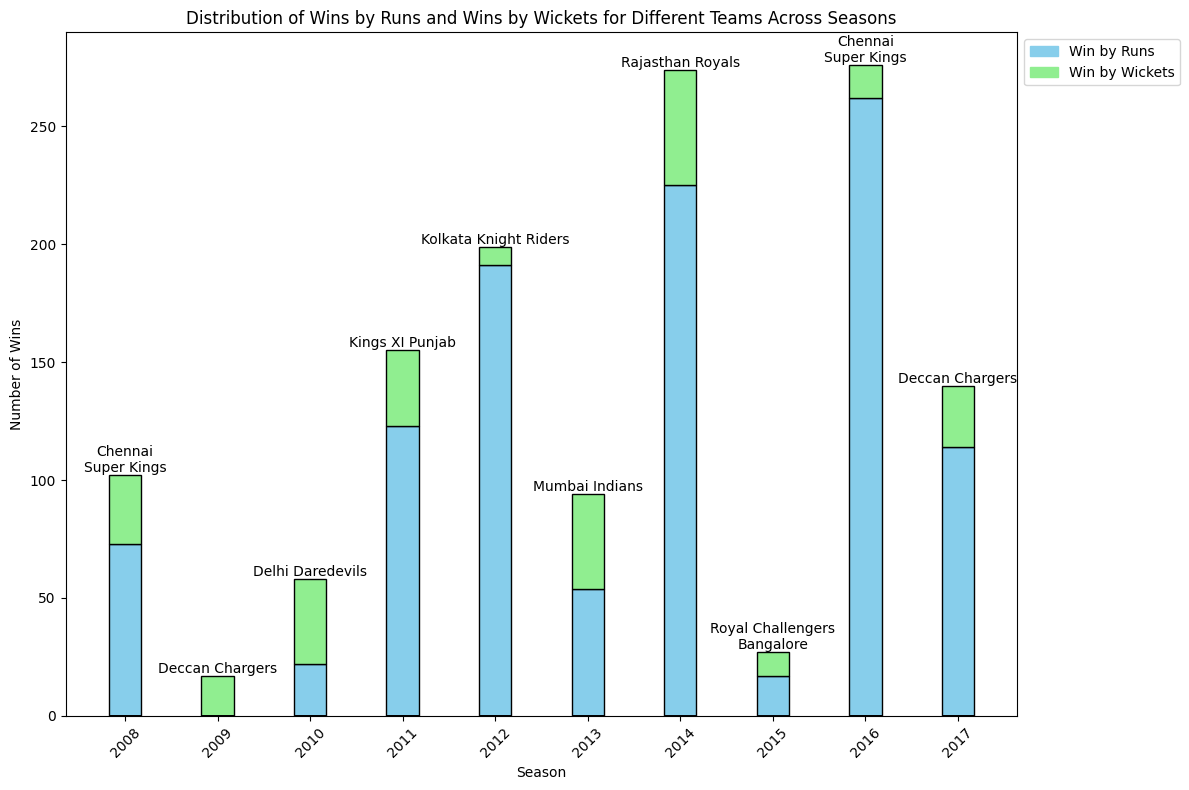

In [137]:
# Filter rows where the 'winner' column is not empty or "0"
df_filtered = dfnew4[dfnew4['winner'].notna() & (dfnew4['winner'] != '0')].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Handle NaN values in the DataFrame
df_filtered.dropna(subset=['win_by_runs', 'win_by_wickets'], inplace=True)

# Group by season and team, then sum their wins by runs and wins by wickets
season_wins = df_filtered.groupby(['season', 'winner'])[['win_by_runs', 'win_by_wickets']].sum().reset_index()

# Create a stacked bar chart to visualize the distribution of wins by runs and wins by wickets for different teams across seasons
plt.figure(figsize=(12, 8))
teams = season_wins['winner'].unique()
bar_width = 0.35
index = range(len(season_wins['season'].unique()))

for i, team in enumerate(teams):
    team_data = season_wins[season_wins['winner'] == team]
    team_data = team_data.reindex(index, fill_value=0)  # Align data with index and fill NaN values with 0
    plt.bar(index, team_data['win_by_runs'], width=bar_width, label=f'{team} (Win by Runs)', color='skyblue', edgecolor='black')
    plt.bar(index, team_data['win_by_wickets'], width=bar_width, label=f'{team} (Win by Wickets)', color='lightgreen', edgecolor='black', bottom=team_data['win_by_runs'])

plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.title('Distribution of Wins by Runs and Wins by Wickets for Different Teams Across Seasons')
plt.xticks(index, season_wins['season'].unique(), rotation=45)

# Create a custom legend with colors only
legend_colors = {'Win by Runs': 'skyblue', 'Win by Wickets': 'lightgreen'}
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors.values()]
labels = legend_colors.keys()
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

# Add team names to the bars only if the combined wins are significant
threshold = 5  # Define a threshold for combined wins
for i, team in enumerate(teams):
    team_data = season_wins[season_wins['winner'] == team]
    team_data = team_data.reindex(index, fill_value=0)  # Align data with index and fill NaN values with 0
    for j in index:
        combined_wins = team_data.iloc[j]['win_by_runs'] + team_data.iloc[j]['win_by_wickets']
        if combined_wins >= threshold:
            if team == 'Chennai Super Kings':
                team_name = 'Chennai\nSuper Kings'
            elif team == 'Royal Challengers Bangalore':
                team_name = 'Royal Challengers\nBangalore'
            else:
                team_name = team
            plt.text(j, combined_wins, team_name, ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


1. **Findings** **from** **the** **Visual**:



*   The graph visually represents the distribution of wins by runs and wins by wickets for various cricket teams across different seasons.
Each bar in the graph corresponds to a specific team and season, with stacked bars indicating the number of wins by runs and wins by wickets for each team-season combination.
*   Teams with more wins by runs have higher bars in the respective seasons, and similarly for wins by wickets.




2. **Reason** **for** **Selecting** **the** **Chart** **Type**:


*   A stacked bar chart was chosen because it allows for easy comparison of the distribution of wins by different criteria (runs and wickets) across multiple seasons and teams.
*   Stacking the bars also helps in understanding the total number of wins by combining wins by runs and wins by wickets.




3. **Pre**-**Attentive** **Attributes** **Used**:


*   Color: Different colors (skyblue for wins by runs and lightgreen for wins by wickets) are used to differentiate between the two types of wins, making it easier for viewers to interpret the graph.
*   Size: The height of the bars represents the number of wins, providing a visual cue for the magnitude of wins for each team and season.




4. **Gestalt** **Principles** **Used**:


*   Proximity: The bars for each team-season combination are close together, emphasizing their association and making it easier to compare wins for the same team across seasons.
*   Similarity: Using the same color scheme (skyblue and lightgreen) for wins by runs and wins by wickets respectively creates a sense of similarity and consistency in the graph, aiding in quick comprehension.



